# Recycling to boost performance
This file can be used to include real image and mask applied from previous model to boost performance

In [1]:
!nvidia-smi 


Wed May 28 21:59:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8             11W /   70W |     373MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
import numpy as np
import zarr
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import img_as_uint
import skimage

# Set base directory and paths for training images and masks
SyMBac_dir = "D:/PRISM/Omnipose_train/SyMBacData/60x_pc_20250528/"
conv_dir = os.path.join(SyMBac_dir, "convolutions")
mask_dir = os.path.join(SyMBac_dir, "masks")

# Ensure directories exist
os.makedirs(conv_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# Load Zarr files for images and masks
image_path = r'D:\PRISM\trenches_0000growth.zarr'
mask_path = r'D:\PRISM\masks_uninduced_all_2.zarr'
z1 = zarr.open(image_path, 'r')  # Original images
z2 = zarr.open(mask_path, 'r')    # Masks



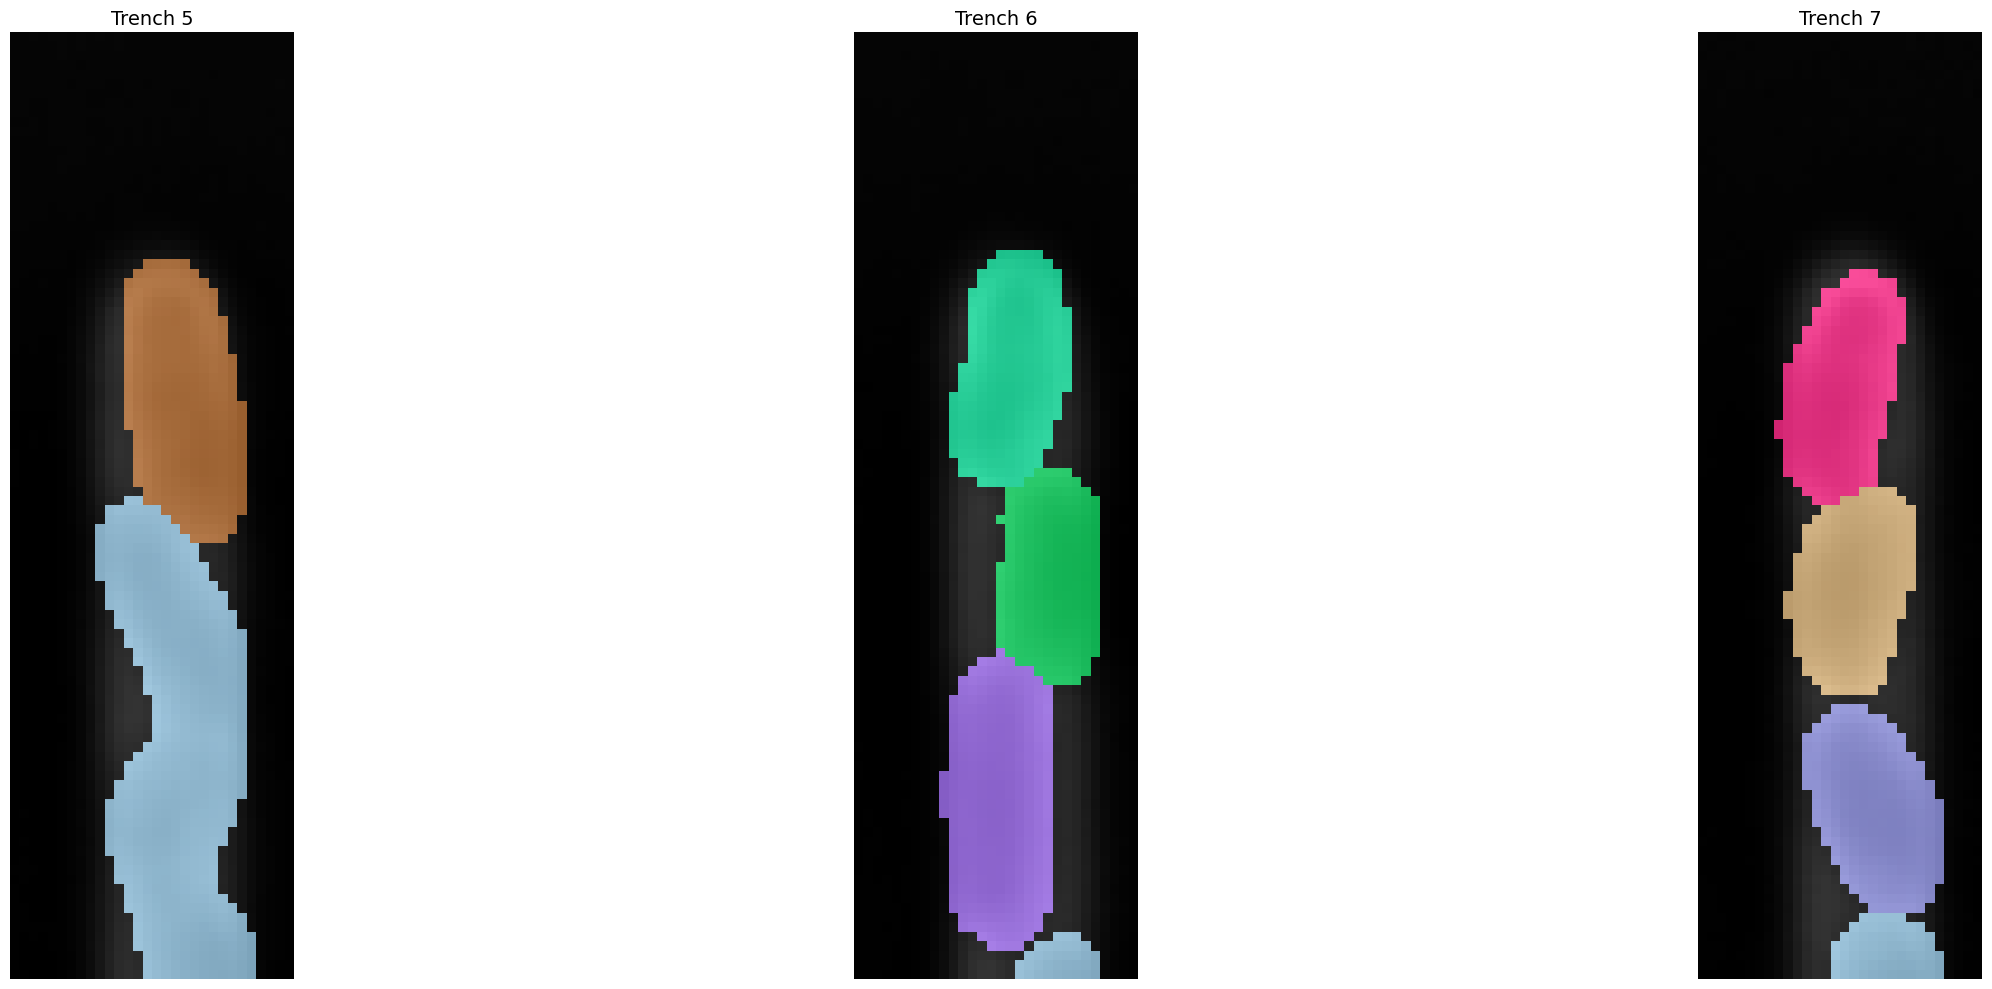

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def random_label_cmap(n_labels=256, seed=42):
    """Create a random ListedColormap for integer masks."""
    np.random.seed(seed)
    colors = np.random.rand(n_labels, 3)
    colors[0] = [0, 0, 0]  # Background as black
    return ListedColormap(colors)

def visualize_trenches_with_mask(trench_indices, alpha=0.5, image_scale=6):
    """
    Visualize selected trenches with distinct-colored mask overlay and larger display.

    Parameters:
    - trench_indices: List of indices of trenches to visualize.
    - alpha: Transparency level for mask overlay (0.0 to 1.0).
    - image_scale: Size multiplier per subplot (default is 6).
    """
    cmap_mask = random_label_cmap(n_labels=256)
    n = len(trench_indices)

    fig, axes = plt.subplots(1, n, figsize=(image_scale * n, image_scale))
    if n == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, i in zip(axes, trench_indices):
        real_image = z1[i, 0, 0, :, :]
        mask = z2[i, 0, 0, :, :]

        ax.imshow(real_image, cmap='gray', interpolation='nearest')
        ax.imshow(mask, cmap=cmap_mask, alpha=alpha, interpolation='nearest')
        ax.set_title(f"Trench {i}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
trench_indices = [5,6,7]
visualize_trenches_with_mask(trench_indices, alpha=0.8, image_scale=10)


In [ ]:
import napari
import numpy as np

viewer = napari.Viewer()
images = z1[:,0,0,:,:]   # shape (N, H, W)
masks  = z2[:,0,0,:,:]   # same shape

viewer.add_image(images, name='trenches', colormap='gray')
viewer.add_labels(masks, name='masks', opacity=0.6)
napari.run()


In [ ]:
trench_indices = [0, 2, 4, 6, 7, 27, 33, 34, 35, 36, 38, 41, 45, ]

In [42]:
len(trench_indices)

17

In [44]:


# Function to add selected real images to the training set
def add_real_images(trench_indices):
    count = len([entry for entry in os.listdir(conv_dir) if os.path.isfile(os.path.join(conv_dir, entry))])

    for i, trench_index in enumerate(trench_indices, start=count):
        # Load the real trench image and mask
        real_image = np.array(z1[trench_index, 0, 0, :, :])
        real_mask = np.array(z2[trench_index, 0, 0, :, :])

        # Save the real trench image to convolutions directory
        syn_image = Image.fromarray(img_as_uint(real_image))
        syn_image.save(os.path.join(conv_dir, f"RealSynth_{str(i).zfill(5)}.png"))

        # Save the corresponding mask to masks directory
        mask_image = Image.fromarray(real_mask.astype(np.uint8))
        mask_image.save(os.path.join(mask_dir, f"RealSynth_{str(i).zfill(5)}_masks.png"))

        print(f"Saved RealSynth_{str(i).zfill(5)}.png and its mask.")

# Call the function to add selected trenches
add_real_images(trench_indices)


Saved RealSynth_03582.png and its mask.
Saved RealSynth_03583.png and its mask.
Saved RealSynth_03584.png and its mask.
Saved RealSynth_03585.png and its mask.
Saved RealSynth_03586.png and its mask.
Saved RealSynth_03587.png and its mask.
Saved RealSynth_03588.png and its mask.
Saved RealSynth_03589.png and its mask.
Saved RealSynth_03590.png and its mask.
Saved RealSynth_03591.png and its mask.
Saved RealSynth_03592.png and its mask.
Saved RealSynth_03593.png and its mask.
Saved RealSynth_03594.png and its mask.
Saved RealSynth_03595.png and its mask.
Saved RealSynth_03596.png and its mask.
Saved RealSynth_03597.png and its mask.
Saved RealSynth_03598.png and its mask.
